In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Kullanılan cihaz:", device)
if torch.cuda.is_available():
    print("CUDA kullanılıyor.")
    print("GPU adı:", torch.cuda.get_device_name(0))
else:
    print("CUDA aktif değil.")

Kullanılan cihaz: cuda
CUDA kullanılıyor.
GPU adı: NVIDIA A100-SXM4-40GB


In [67]:
import numpy as np
import pandas as pd
from PIL import Image
from IPython.display import Image as show_image
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam


In [68]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("emmarex/plantdisease")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'plantdisease' dataset.
Path to dataset files: /kaggle/input/plantdisease


In [69]:
import os

base_dir = path + "/PlantVillage"
os.listdir(base_dir)

['Pepper__bell___Bacterial_spot',
 'Potato___healthy',
 'Tomato_Leaf_Mold',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Bacterial_spot',
 'Tomato_Septoria_leaf_spot',
 'Tomato_healthy',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato_Early_blight',
 'Tomato__Target_Spot',
 'Pepper__bell___healthy',
 'Potato___Late_blight',
 'Tomato_Late_blight',
 'Potato___Early_blight',
 'Tomato__Tomato_mosaic_virus']

In [70]:
all_image_paths = []
all_labels = []

In [71]:
for class_name in os.listdir(base_dir):
    class_dir = os.path.join(base_dir, class_name)
    if not os.path.isdir(class_dir):
        continue
    for fname in os.listdir(class_dir):
        if fname.lower().endswith((".jpg", ".jpeg", ".png")):
            all_image_paths.append(os.path.join(class_dir, fname))
            all_labels.append(class_name)


In [72]:
df = pd.DataFrame({"filename": all_image_paths, "class": all_labels})


In [73]:
train_df, temp_df = train_test_split(
    df,
    test_size=0.3,
    stratify=df["class"],
    random_state=42
)

In [74]:
val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    stratify=temp_df["class"],
    random_state=42
)

In [75]:
img_size = (224, 224)
batch_size = 128

In [76]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
val_test_datagen = ImageDataGenerator(rescale=1./255)

In [77]:
train_gen = train_datagen.flow_from_dataframe(
    train_df,
    x_col="filename",
    y_col="class",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

Found 14446 validated image filenames belonging to 15 classes.


In [78]:
val_gen = val_test_datagen.flow_from_dataframe(
    val_df,
    x_col="filename",
    y_col="class",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


Found 3096 validated image filenames belonging to 15 classes.


In [79]:
test_gen = val_test_datagen.flow_from_dataframe(
    test_df,
    x_col="filename",
    y_col="class",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 3096 validated image filenames belonging to 15 classes.


In [80]:
num_classes = len(train_gen.class_indices)
print("Sınıf sayısı:", num_classes)

Sınıf sayısı: 15


In [81]:
base_dir = path + "/PlantVillage"
os.listdir(base_dir)

['Pepper__bell___Bacterial_spot',
 'Potato___healthy',
 'Tomato_Leaf_Mold',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Bacterial_spot',
 'Tomato_Septoria_leaf_spot',
 'Tomato_healthy',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato_Early_blight',
 'Tomato__Target_Spot',
 'Pepper__bell___healthy',
 'Potato___Late_blight',
 'Tomato_Late_blight',
 'Potato___Early_blight',
 'Tomato__Tomato_mosaic_virus']

In [82]:
train_gen[1]

(array([[[[0.7408946 , 0.7173652 , 0.7173652 ],
          [0.7475868 , 0.7240574 , 0.7240574 ],
          [0.75456077, 0.73103136, 0.73103136],
          ...,
          [0.8341675 , 0.8184812 , 0.8224028 ],
          [0.8572666 , 0.84158033, 0.8455019 ],
          [0.87208235, 0.8563961 , 0.86031765]],
 
         [[0.74001825, 0.71648884, 0.71648884],
          [0.745834  , 0.7223046 , 0.7223046 ],
          [0.75280803, 0.7292786 , 0.7292786 ],
          ...,
          [0.8572011 , 0.8415148 , 0.8454364 ],
          [0.8853405 , 0.86965424, 0.8735758 ],
          [0.88787496, 0.8721887 , 0.87611026]],
 
         [[0.7391419 , 0.7156125 , 0.7156125 ],
          [0.74408126, 0.72055185, 0.72055185],
          [0.7510553 , 0.7275259 , 0.7275259 ],
          ...,
          [0.8601155 , 0.84442925, 0.8483508 ],
          [0.8687836 , 0.8530973 , 0.8570189 ],
          [0.8598719 , 0.84418565, 0.8481072 ]],
 
         ...,
 
         [[0.27782342, 0.27390185, 0.32880384],
          [0.27622

In [83]:
train_gen[14]

(array([[[[0.48235297, 0.43529415, 0.47450984],
          [0.5040981 , 0.4570393 , 0.49625498],
          [0.59477663, 0.5477178 , 0.5869335 ],
          ...,
          [0.6490208 , 0.60811174, 0.6394843 ],
          [0.6412637 , 0.60000205, 0.6313746 ],
          [0.63350666, 0.5918924 , 0.62326497]],
 
         [[0.48235297, 0.43529415, 0.47450984],
          [0.4915889 , 0.44453004, 0.48374572],
          [0.6170904 , 0.5700316 , 0.60924727],
          ...,
          [0.6288638 , 0.58572656, 0.6170991 ],
          [0.6359157 , 0.59277844, 0.624151  ],
          [0.6429675 , 0.59983027, 0.6312028 ]],
 
         [[0.48235297, 0.43529415, 0.47450984],
          [0.48235297, 0.43529415, 0.47450984],
          [0.62074995, 0.5736911 , 0.6129068 ],
          ...,
          [0.67008024, 0.626943  , 0.65831554],
          [0.6676121 , 0.6244748 , 0.6558474 ],
          [0.66514397, 0.62200665, 0.65337926]],
 
         ...,
 
         [[0.544811  , 0.51343846, 0.56441885],
          [0.54551

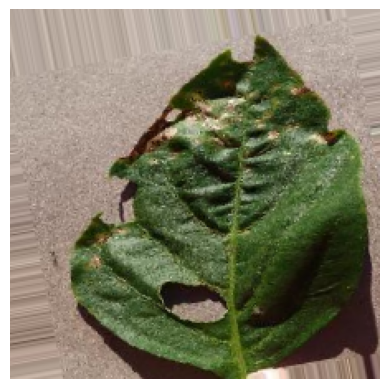

In [84]:
plt.imshow(next(train_gen)[0][0]); plt.axis("off")
plt.show()

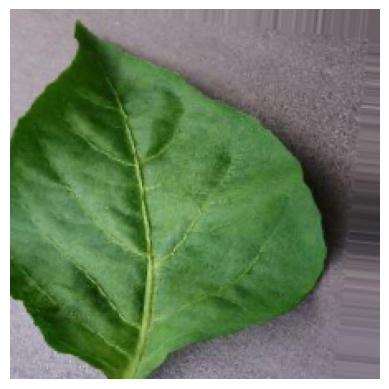

In [85]:
plt.imshow(next(train_gen)[0][30]); plt.axis("off")
plt.show()


In [86]:
num_classes = 15

In [87]:
cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax")
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [88]:
cnn.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [89]:
cnn_fit = cnn.fit(
    train_gen,
    epochs=15,
    validation_data=val_gen
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.2904 - loss: 2.2870 - val_accuracy: 0.6179 - val_loss: 1.1970
Epoch 2/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.6325 - loss: 1.1338 - val_accuracy: 0.6851 - val_loss: 0.9768
Epoch 3/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.7177 - loss: 0.8584 - val_accuracy: 0.7652 - val_loss: 0.7214
Epoch 4/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.7650 - loss: 0.6960 - val_accuracy: 0.7087 - val_loss: 1.0028
Epoch 5/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.7886 - loss: 0.6505 - val_accuracy: 0.8078 - val_loss: 0.6305
Epoch 6/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.8124 - loss: 0.5647 - val_accuracy: 0.7390 - val_loss: 0.9136
Epoch 7/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.8086 - loss: 0.5674 - val_accuracy: 0.8559 - val_loss: 0.4408
Epoch 8/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.8442 - loss: 0.4585 - val_accu

In [90]:
test_gen.reset()
y_true = test_gen.classes
y_pred_prob = cnn.predict(test_gen)
y_pred = np.argmax(y_pred_prob, axis=1)
confuse = confusion_matrix(y_true, y_pred)
confuse.tolist()

25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 268ms/step


[[131, 6, 1, 0, 1, 0, 4, 1, 0, 4, 0, 0, 1, 0, 0],
 [2, 219, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 147, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
 [0, 1, 10, 137, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 2, 0, 0, 20, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 3, 0, 307, 3, 0, 0, 0, 0, 5, 1, 0, 0],
 [0, 2, 4, 3, 0, 4, 126, 4, 0, 0, 0, 0, 1, 0, 6],
 [0, 6, 7, 15, 0, 1, 15, 240, 0, 0, 0, 0, 0, 0, 3],
 [1, 2, 1, 0, 0, 0, 2, 10, 118, 4, 1, 2, 0, 0, 2],
 [1, 2, 11, 5, 0, 1, 10, 6, 2, 213, 0, 0, 0, 0, 15],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 211, 13, 0, 3, 25],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 9, 173, 0, 0, 27],
 [0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 7, 0, 469, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 45, 7],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 237]]

In [91]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224,224,3))
base_model.trainable = False

In [92]:
resnet = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax")
])

In [93]:
resnet.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [94]:
resnet_fit = resnet.fit(
    train_gen,
    epochs=15,
    validation_data=val_gen
)

Epoch 1/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.1330 - loss: 2.6974 - val_accuracy: 0.1825 - val_loss: 2.4831
Epoch 2/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.1705 - loss: 2.5031 - val_accuracy: 0.2242 - val_loss: 2.3846
Epoch 3/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.1960 - loss: 2.4113 - val_accuracy: 0.2506 - val_loss: 2.3196
Epoch 4/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.2133 - loss: 2.3565 - val_accuracy: 0.2645 - val_loss: 2.2648
Epoch 5/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.2360 - loss: 2.3095 - val_accuracy: 0.2920 - val_loss: 2.2284
Epoch 6/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.2547 - loss: 2.2528 - val_accuracy: 0.3104 - val_loss: 2.1230
Epoch 7/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.2614 - loss: 2.2092 - val_accuracy: 0.3165 - val_loss: 2.1546
Epoch 8/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.2731 - loss: 2.1868 - val_accu

In [95]:
test_gen.reset()
y_true = test_gen.classes
y_pred_prob = resnet.predict(test_gen)
y_pred = np.argmax(y_pred_prob, axis=1)
confuse = confusion_matrix(y_true, y_pred)
confuse.tolist()

25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 425ms/step


[[44, 55, 37, 0, 0, 0, 0, 1, 0, 1, 0, 9, 1, 0, 1],
 [8, 129, 58, 2, 0, 2, 0, 0, 0, 10, 2, 5, 1, 0, 4],
 [2, 13, 116, 1, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 14],
 [3, 7, 33, 17, 0, 6, 0, 1, 0, 12, 21, 24, 1, 0, 25],
 [0, 2, 10, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 7],
 [0, 15, 0, 2, 0, 206, 0, 6, 0, 29, 3, 0, 52, 0, 6],
 [10, 18, 18, 1, 0, 9, 0, 5, 0, 17, 13, 16, 30, 0, 13],
 [17, 20, 31, 2, 0, 35, 0, 8, 0, 24, 27, 34, 59, 0, 30],
 [4, 6, 11, 3, 0, 29, 0, 0, 0, 9, 27, 20, 25, 0, 9],
 [3, 32, 61, 4, 0, 41, 0, 1, 0, 17, 22, 26, 20, 0, 39],
 [0, 1, 3, 2, 0, 1, 0, 1, 0, 1, 103, 19, 1, 0, 120],
 [1, 0, 16, 5, 0, 5, 0, 0, 0, 1, 30, 16, 1, 0, 135],
 [0, 2, 0, 0, 0, 26, 0, 6, 0, 7, 79, 3, 352, 0, 7],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 45, 1, 2, 0, 8],
 [1, 0, 2, 0, 0, 29, 0, 0, 0, 0, 1, 0, 0, 0, 205]]

In [96]:

resnet_ft_base = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

for layer in resnet_ft_base.layers:
    layer.trainable = False



for layer in resnet_ft_base.layers[-2:]:
    layer.trainable = True


model_resnet_ft = models.Sequential([
    resnet_ft_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax")
])

In [97]:
model_resnet_ft.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [98]:
history_resnet_ft = model_resnet_ft.fit(
    train_gen,
    epochs=15,
    validation_data=val_gen
)

Epoch 1/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.0543 - loss: 3.3248 - val_accuracy: 0.0856 - val_loss: 2.8217
Epoch 2/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.0683 - loss: 2.9904 - val_accuracy: 0.1366 - val_loss: 2.6688
Epoch 3/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.0959 - loss: 2.8315 - val_accuracy: 0.1554 - val_loss: 2.6145
Epoch 4/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.1002 - loss: 2.7641 - val_accuracy: 0.1554 - val_loss: 2.5902
Epoch 5/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.1028 - loss: 2.7208 - val_accuracy: 0.1554 - val_loss: 2.5774
Epoch 6/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.1184 - loss: 2.6817 - val_accuracy: 0.1554 - val_loss: 2.5678
Epoch 7/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.1197 - loss: 2.6623 - val_accuracy: 0.1554 - val_loss: 2.5616
Epoch 8/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.1230 - loss: 2.6371 - val_accu

In [99]:
test_gen.reset()
y_true = test_gen.classes
y_pred_prob = model_resnet_ft.predict(test_gen)
y_pred = np.argmax(y_pred_prob, axis=1)
confuse = confusion_matrix(y_true, y_pred)
confuse.tolist()

25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 426ms/step


[[0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 136, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 217, 0, 2],
 [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 147, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 150, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 23, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 319, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 150, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 279, 0, 4],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 143, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 261, 0, 4],
 [0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 244, 0, 4],
 [0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 192, 0, 6],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 482, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 56, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 13, 0, 0, 0, 0, 204, 0, 21]]

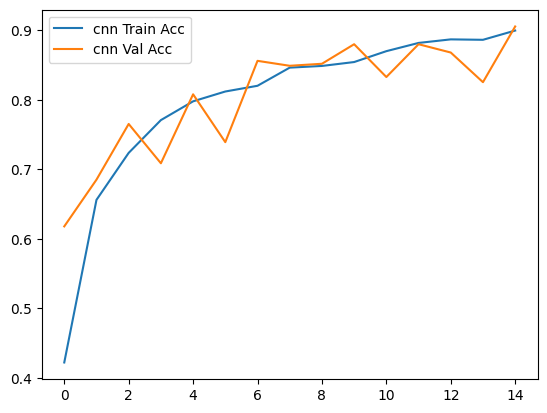

In [100]:
plt.plot(cnn_fit.history["accuracy"], label="cnn Train Acc")
plt.plot(cnn_fit.history["val_accuracy"], label="cnn Val Acc")
plt.legend(); plt.show()

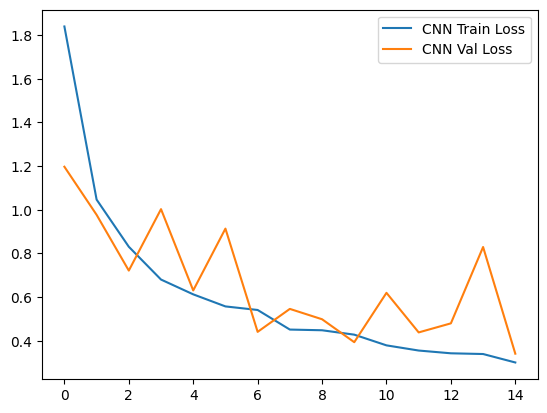

In [101]:
plt.plot(cnn_fit.history["loss"], label="CNN Train Loss")
plt.plot(cnn_fit.history["val_loss"], label="CNN Val Loss")
plt.legend(); plt.show()


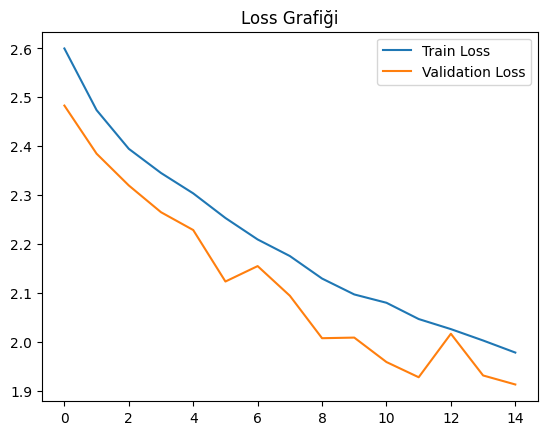

In [102]:
plt.plot(resnet_fit.history["loss"], label="Train Loss")
plt.plot(resnet_fit.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss Grafiği")
plt.show()

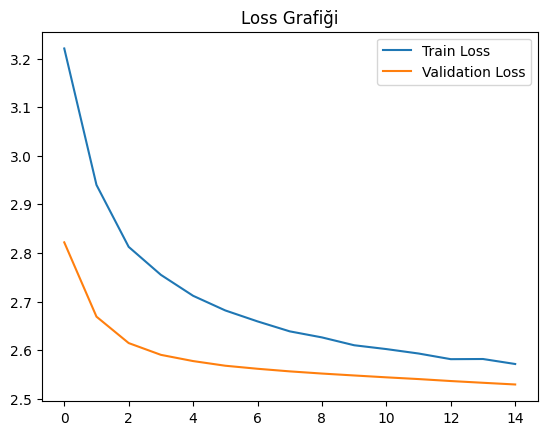

In [103]:
plt.plot(history_resnet_ft.history["loss"], label="Train Loss")
plt.plot(history_resnet_ft.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss Grafiği")
plt.show()

In [104]:
cnn_test_loss, cnn_test_acc = cnn.evaluate(test_gen, verbose=1)
print("CNN Test Accuracy:", cnn_test_acc)

25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - accuracy: 0.9077 - loss: 0.2927
CNN Test Accuracy: 0.9021317958831787


In [105]:
resnet_test_loss, resnet_test_acc = resnet.evaluate(test_gen, verbose=1)
print("ResNet Test Accuracy:", resnet_test_acc)

25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 262ms/step - accuracy: 0.3944 - loss: 1.8627
ResNet Test Accuracy: 0.3917958736419678


In [106]:
resnet_ft_test_loss, resnet_ft_test_acc = model_resnet_ft.evaluate(test_gen, verbose=1)
print("ResNet FT Test Accuracy:", resnet_ft_test_acc)

25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 263ms/step - accuracy: 0.1615 - loss: 2.5265
ResNet FT Test Accuracy: 0.16375969350337982


In [123]:
img = image.load_img("/content/drive/MyDrive/bootcamp_veri_bilimi/Deep-learning/Tomato_Spider_mites.jpg", target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) / 255.0

pred_cnn = cnn.predict(x)
tahmin_cnn = pred_cnn.argmax()

siniflar = list(train_gen.class_indices.keys())
print("CNN Tahmin:", siniflar[tahmin_cnn])
print("CNN Olasılık:", pred_cnn.max())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
CNN Tahmin: Tomato_Spider_mites_Two_spotted_spider_mite
CNN Olasılık: 0.9762448


In [121]:
img = image.load_img("/content/drive/MyDrive/bootcamp_veri_bilimi/Deep-learning/pepper bell bacterial spot leaf.jpg", target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) / 255.0

pred_resnet = resnet.predict(x)
tahmin_vg = pred_resnet.argmax()

siniflar = list(train_gen.class_indices.keys())
print("vgg Tahmin:", siniflar[tahmin_vg])
print("vgg Olasılık:", pred_resnet.max())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
vgg Tahmin: Potato___Early_blight
vgg Olasılık: 0.29158837


In [119]:
img = image.load_img("/content/drive/MyDrive/bootcamp_veri_bilimi/Deep-learning/plant leaf disease.jpg", target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) / 255.0

pred_resnet_ft = model_resnet_ft.predict(x)
tahmin_vg = pred_resnet_ft.argmax()

siniflar = list(train_gen.class_indices.keys())
print("CNN Tahmin:", siniflar[tahmin_vg])
print("CNN Olasılık:", pred_resnet_ft.max())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
CNN Tahmin: Tomato__Tomato_YellowLeaf__Curl_Virus
CNN Olasılık: 0.114776716


In [120]:
img = image.load_img("/content/drive/MyDrive/bootcamp_veri_bilimi/Deep-learning/plant leaf disease.jpg", target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) / 255.0

pred_resnet_ft = model_resnet_ft.predict(x)
tahmin_vgg_ft = pred_resnet_ft.argmax()

siniflar = list(train_gen.class_indices.keys())
print("vg ft Tahmin:", siniflar[tahmin_vgg_ft])
print("vg ft Olasılık:", pred_resnet_ft.max())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
vg ft Tahmin: Tomato__Tomato_YellowLeaf__Curl_Virus
vg ft Olasılık: 0.114776716


In [111]:
pred_vgg = resnet.predict(x)
tahmin_vgg = pred_vgg.argmax()

print("VGG16 Tahmin:", siniflar[tahmin_vgg])
print("VGG16 Olasılık:", pred_vgg.max())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
VGG16 Tahmin: Tomato_Late_blight
VGG16 Olasılık: 0.2278568


In [112]:
pred_vgg_ft = model_resnet_ft.predict(x)
tahmin_vgg_ft = pred_vgg_ft.argmax()

print("VGG16 (Fine-Tuned) Tahmin:", siniflar[tahmin_vgg_ft])
print("VGG16 (Fine-Tuned) Olasılık:", pred_vgg_ft.max())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
VGG16 (Fine-Tuned) Tahmin: Tomato__Tomato_YellowLeaf__Curl_Virus
VGG16 (Fine-Tuned) Olasılık: 0.114776716


In [113]:
# Test set üzerinde modelleri değerlendir
test_gen.reset()
cnn_test_loss, cnn_test_acc = cnn.evaluate(test_gen, verbose=0)

test_gen.reset()
resnet_test_loss, resnet_test_acc = resnet.evaluate(test_gen, verbose=0)

test_gen.reset()
resnet_ft_test_loss, resnet_ft_test_acc = model_resnet_ft.evaluate(test_gen, verbose=0)

# Sonuçları tabloya dök
sonuclar = {
    "Model": ["CNN", "ResNet50", "ResNet50 Fine-Tuned"],
    "Train Accuracy": [
        cnn_fit.history["accuracy"][-1],
        resnet_fit.history["accuracy"][-1],
        history_resnet_ft.history["accuracy"][-1]
    ],
    "Validation Accuracy": [
        cnn_fit.history["val_accuracy"][-1],
        resnet_fit.history["val_accuracy"][-1],
        history_resnet_ft.history["val_accuracy"][-1]
    ],
    "Test Accuracy": [
        cnn_test_acc,
        resnet_test_acc,
        resnet_ft_test_acc
    ]
}

karsilastirma_tablosu = pd.DataFrame(sonuclar)
karsilastirma_tablosu


,Model,Train Accuracy,Validation Accuracy,Test Accuracy
0,CNN,0.899488,0.905362,0.902132
1,ResNet50,0.335179,0.391473,0.391796
2,ResNet50 Fine-Tuned,0.153191,0.163114,0.163760


In [114]:
## Sonuç ve Değerlendirme
"""
veri setini alıp, veri seti hakkında egnel bir bilgi sahiib olduktan sonra
modele girecek verilerin boyut kalıbını ayarlama ve veriyi, test,train ve validation
diye 3 e böldüm. sonrasında verilerin olduğu gibi değilde hafif sağa,sola,yukarı ve aşağı
oynatarak modelin daha öğrenmesini sağlıyacak kodları yazdım.

cnn modeli,olduğu gibi kullanılmış  ResNet50 modeli ve son katmanları
tekrar öğretilmiş ResNet50 modeli olmak üzere üç farklı
ResNet50 modeli dışında sıfırdan oluşturduğum bir CNN modelini
kullandım. ResNet50 modelini ve CNN modelini test ettiğimde en iyi
ve en dengeli sonuçların CNN modelinden geldiğini fark ettim. Bunun
sebebi veri artırma ve epoch ve bach değerlerinin dengeli olmasıdır. En sonda tüm eğitim veri
setini kullanarak
modelleri test ettim ve tüm verileri aşağdaki tabloda görselleştirdim. Genel olarak
sıfırdan çalışan CNN modelinin daha iyi sonuçlar verdiğini gözlemledim.


epoch 5 vererk cnn'i eğittim 10'u denrken gpu bağlantısı gitti ama yinede graiklerden de cnn
modelinin iyi tahmin yaptığı anlaşılmakta.
"""


"\nveri setini alıp, veri seti hakkında egnel bir bilgi sahiib olduktan sonra\nmodele girecek verilerin boyut kalıbını ayarlama ve veriyi, test,train ve validation\ndiye 3 e böldüm. sonrasında verilerin olduğu gibi değilde hafif sağa,sola,yukarı ve aşağı\noynatarak modelin daha öğrenmesini sağlıyacak kodları yazdım.\n\ncnn modeli,olduğu gibi kullanılmış  ResNet50 modeli ve son katmanları\ntekrar öğretilmiş ResNet50 modeli olmak üzere üç farklı\nResNet50 modeli dışında sıfırdan oluşturduğum bir CNN modelini\nkullandım. ResNet50 modelini ve CNN modelini test ettiğimde en iyi\nve en dengeli sonuçların CNN modelinden geldiğini fark ettim. Bunun\nsebebi veri artırma ve epoch ve bach değerlerinin dengeli olmasıdır. En sonda tüm eğitim veri\nsetini kullanarak\nmodelleri test ettim ve tüm verileri aşağdaki tabloda görselleştirdim. Genel olarak\nsıfırdan çalışan CNN modelinin daha iyi sonuçlar verdiğini gözlemledim.\n\n\nepoch 5 vererk cnn'i eğittim 10'u denrken gpu bağlantısı gitti ama yinede 